# CAPE

## Necessary libraries

In [1]:
# Libraries
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import wrf

import cartopy
import cartopy.crs as ccrs
import matplotlib.colors as colors

## Datasets

In [2]:
# define main paths for observations and reanalysis + for simulations
obs_path = '/media/irene/Elements/Laptop_dec2023/Thesis_data/obs/'
sim_path = '/media/irene/Elements/wrf_micro/'
obss_path = '/media/irene/Elements/Laptop_dec2023/Thesis_data/sobs/'
sims_path = '/media/irene/Elements/wrf_micro_snow/'

In [3]:
# Open datasets (WRF already regridded)
ds_ccERA = xr.open_dataset(f'{obs_path}/ERA5-CAPE-CIN-MCScase.nc')
ds_cctho = xr.open_dataset(f'{sim_path}/Thompson/reg_wrftho_cape-16to24.nc')
ds_ccmor = xr.open_dataset(f'{sim_path}/Morrison/reg_wrfmor_cape-16to24.nc')
ds_cccam = xr.open_dataset(f'{sim_path}/CAM/reg_wrfcam_cape-16to24.nc')
ds_ccylin = xr.open_dataset(f'{sim_path}/Ylin/reg_wrfylin_cape-16to24.nc')
ds_ccwdm7 = xr.open_dataset(f'{sim_path}/WDM7/reg_wrfwdm7_cape-16to24.nc')
ds_ccwdm6 = xr.open_dataset(f'{sim_path}/WDM6/reg_wrfwdm6_cape-16to24.nc')

dss_ccERA = xr.open_dataset(f'{obss_path}/ERA5-PBLH-CAPE-CIN-moistureflux-SNOW.nc')
dss_cctho = xr.open_dataset(f'{sims_path}/Thompson/reg_wrftho_cape-4to9.nc')
dss_ccmor = xr.open_dataset(f'{sims_path}/Morrison/reg_wrfmor_cape-4to9.nc')
dss_cccam = xr.open_dataset(f'{sims_path}/CAM/reg_wrfcam_cape-4to9.nc')
dss_ccylin = xr.open_dataset(f'{sims_path}/Ylin/reg_wrfylin_cape-4to9.nc')
dss_ccwdm7 = xr.open_dataset(f'{sims_path}/WDM7/reg_wrfwdm7_cape-4to9.nc')
dss_ccwdm6 = xr.open_dataset(f'{sims_path}/WDM6/reg_wrfwdm6_cape-4to9.nc')

In [4]:
#Define time:
times=['2008-07-16', '2008-07-17', '2008-07-18', '2008-07-19', '2008-07-20', '2008-07-21', '2008-07-22', '2008-07-23', '2008-07-24']
timess= ['2018-10-04','2018-10-05','2018-10-06','2018-10-07','2018-10-08', '2018-10-09']

## Cut temporal and spatial domain

In [5]:
# Define Sichuan Basin
lat1, lat2 = 26, 35
lon1, lon2 = 100, 114


#cut
ds_ccERAc = ds_ccERA.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2), time=slice('2008-07-16T00:00:00.000000000', '2008-07-24T23:00:00.000000000'))
ds_ccthoc = ds_cctho.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_ccmorc = ds_ccmor.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_cccamc = ds_cccam.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_ccylinc = ds_ccylin.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_ccwdm7c = ds_ccwdm7.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))
ds_ccwdm6c = ds_ccwdm6.sel(latitude=slice(lat2,lat1), longitude=slice(lon1,lon2))

In [6]:
# Define Nam Co
lats1, lats2 = 27, 35
lons1, lons2 = 90, 105


#cut
dss_ccERAc = dss_ccERA.sel(latitude=slice(lats2,lats1), longitude=slice(lons1,lons2), time=slice('2018-10-04T00:00:00.000000000', '2018-10-09T23:00:00.000000000'))
dss_ccthoc = dss_cctho.sel(latitude=slice(lats2,lats1), longitude=slice(lons1,lons2))
dss_ccmorc = dss_ccmor.sel(latitude=slice(lats2,lats1), longitude=slice(lons1,lons2))
dss_cccamc = dss_cccam.sel(latitude=slice(lats2,lats1), longitude=slice(lons1,lons2))
dss_ccylinc = dss_ccylin.sel(latitude=slice(lats2,lats1), longitude=slice(lons1,lons2))
dss_ccwdm7c = dss_ccwdm7.sel(latitude=slice(lats2,lats1), longitude=slice(lons1,lons2))
dss_ccwdm6c = dss_ccwdm6.sel(latitude=slice(lats2,lats1), longitude=slice(lons1,lons2))

## Compute CAPE average

In [7]:
# Mean over space
smean_capeERA = (dss_ccERAc.cape).mean(dim=('latitude', 'longitude'))

# Mean over 2d space
smean_capetho = (dss_ccthoc.AFWA_CAPE).mean(dim=('latitude', 'longitude'))
smean_capemor = (dss_ccmorc.AFWA_CAPE).mean(dim=('latitude', 'longitude'))
smean_capecam = (dss_cccamc.AFWA_CAPE).mean(dim=('latitude', 'longitude'))
smean_capeylin = (dss_ccylinc.AFWA_CAPE).mean(dim=('latitude', 'longitude'))
smean_capewdm7 = (dss_ccwdm7c.AFWA_CAPE).mean(dim=('latitude', 'longitude'))
smean_capewdm6 = (dss_ccwdm6c.AFWA_CAPE).mean(dim=('latitude', 'longitude'))

In [8]:
# Mean over space
mean_capeERA = (ds_ccERAc.cape).mean(dim=('latitude', 'longitude'))

# Mean over 2d space of CAPE
mean_capetho = (ds_ccthoc.AFWA_CAPE).mean(dim=('latitude', 'longitude'))
mean_capemor = (ds_ccmorc.AFWA_CAPE).mean(dim=('latitude', 'longitude'))
mean_capecam = (ds_cccamc.AFWA_CAPE).mean(dim=('latitude', 'longitude'))
mean_capeylin = (ds_ccylinc.AFWA_CAPE).mean(dim=('latitude', 'longitude'))
mean_capewdm7 = (ds_ccwdm7c.AFWA_CAPE).mean(dim=('latitude', 'longitude'))
mean_capewdm6 = (ds_ccwdm6c.AFWA_CAPE).mean(dim=('latitude', 'longitude'))

In [9]:
# Calculate daily mean and then plot 9 points for mcs case
groups = [[mean_capeERA[x:x+24] for x in range(0, len(mean_capeERA), 24)], [mean_capetho[x:x+24] for x in range(0, len(mean_capetho), 24)], [mean_capemor[x:x+24] for x in range(0, len(mean_capemor), 24)], [mean_capecam[x:x+24] for x in range(0, len(mean_capecam), 24)], [mean_capeylin[x:x+24] for x in range(0, len(mean_capeylin), 24)], [mean_capewdm7[x:x+24] for x in range(0, len(mean_capewdm7), 24)], [mean_capewdm6[x:x+24] for x in range(0, len(mean_capewdm6), 24)]]

# Simple math to calculate the means
avgdaily= np.zeros([7,9])
for m in range(0,7):#number of datasets
 for i in range(0,9): #9 days
    avgdaily[m][i] = sum(groups[m][i])/24;

In [10]:
#Calculate daily mean and then plot 6 points for snow case
sgroups = [[smean_capeERA[x:x+24] for x in range(0, len(smean_capeERA), 24)], [smean_capetho[x:x+24] for x in range(0, len(smean_capetho), 24)], [smean_capemor[x:x+24] for x in range(0, len(smean_capemor), 24)], [smean_capecam[x:x+24] for x in range(0, len(smean_capecam), 24)], [smean_capeylin[x:x+24] for x in range(0, len(smean_capeylin), 24)], [smean_capewdm7[x:x+24] for x in range(0, len(smean_capewdm7), 24)], [smean_capewdm6[x:x+24] for x in range(0, len(smean_capewdm6), 24)]]

# Simple math to calculate the means
savgdaily= np.zeros([7,6])
for m in range(0,7):#number of datasets
 for i in range(0,6): #6 days
    savgdaily[m][i] = sum(sgroups[m][i])/24;

## Plot

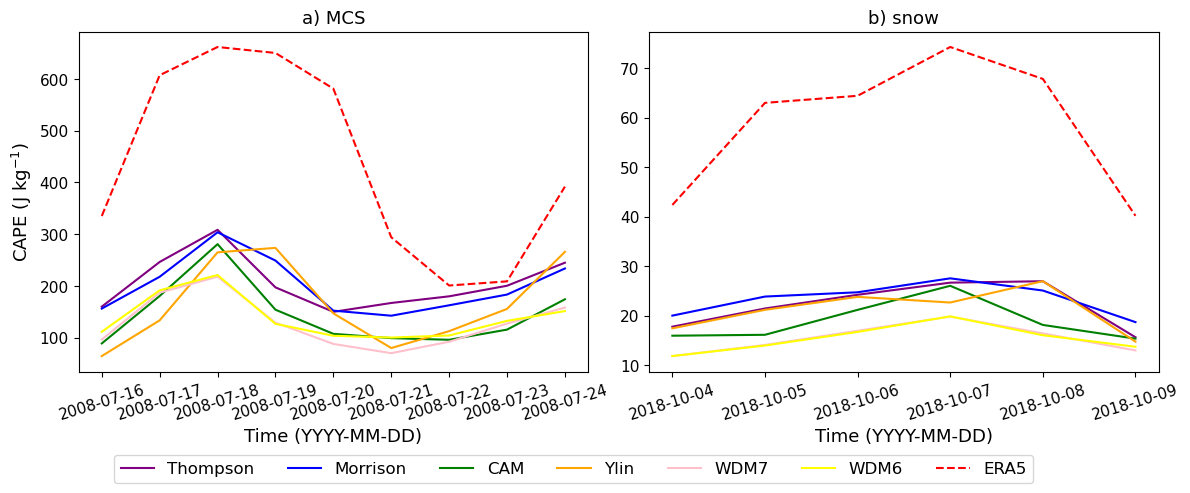

In [11]:
# Timeseries of CAPE for mcs and snow
nrows, ncols = 1,2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,4))
axs = axs.flatten()

#
axs[0].plot(times, avgdaily[1], color='purple', label='Thompson')
axs[0].plot(times, avgdaily[2], color='blue', label='Morrison')
axs[0].plot(times, avgdaily[3], color='green', label='CAM')
axs[0].plot(times, avgdaily[4], color='orange', label='Ylin')
axs[0].plot(times, avgdaily[5], color='pink', label='WDM7')
axs[0].plot(times, avgdaily[6], color='yellow', label='WDM6')
axs[0].plot(times, avgdaily[0], linestyle='dashed', color='red', label='ERA5')

axs[0].tick_params(axis='y', labelsize=11)
axs[0].tick_params(axis='x', rotation=17, labelsize=11)
axs[0].set_title('a) MCS', fontsize=13)
axs[0].set_ylabel(r'CAPE (J kg$^{-1}$)', fontsize=13)
axs[0].set_xlabel(r'Time (YYYY-MM-DD)', fontsize=13)

#
axs[1].plot(timess, savgdaily[1], color='purple', label='Thompson')
axs[1].plot(timess, savgdaily[2], color='blue', label='Morrison')
axs[1].plot(timess, savgdaily[3], color='green', label='CAM')
axs[1].plot(timess, savgdaily[4], color='orange', label='Ylin')
axs[1].plot(timess, savgdaily[5], color='pink', label='WDM7')
axs[1].plot(timess, savgdaily[6], color='yellow', label='WDM6')
axs[1].plot(timess, savgdaily[0], linestyle='dashed', color='red', label='ERA5')

axs[1].legend(loc='upper right', ncol=7, bbox_to_anchor=(0.77, -0.22), fontsize=12)
axs[1].tick_params(axis='y', labelsize=11)
axs[1].tick_params(axis='x', rotation=17, labelsize=11)
axs[1].set_title('b) snow', fontsize=13)
axs[1].set_xlabel(r'Time (YYYY-MM-DD)', fontsize=13)

plt.tight_layout()
fig.subplots_adjust(bottom=0.1, top=0.95, left=0.05, right=0.95, wspace=0.12, hspace=0.25)

#plt.savefig('/media/irene/Elements/Laptop_dec2023/Thesis_data/images_submission/cape.png', dpi=400, bbox_inches='tight');

plt.savefig('/media/irene/Elements/Laptop_dec2023/Thesis_data/images_submission_svg/cape-svg.svg', format='svg', dpi=400, bbox_inches='tight')


## Maps

In [12]:
# Means over time for maps
meant_capeERA = (ds_ccERAc.cape).mean(dim='time')

meant_capetho = (ds_ccthoc.AFWA_CAPE).mean(dim='XTIME')
meant_capemor = (ds_ccmorc.AFWA_CAPE).mean(dim='XTIME')
meant_capecam = (ds_cccamc.AFWA_CAPE).mean(dim='XTIME')
meant_capeylin = (ds_ccylinc.AFWA_CAPE).mean(dim='XTIME')
meant_capewdm7 = (ds_ccwdm7c.AFWA_CAPE).mean(dim='XTIME')
meant_capewdm6 = (ds_ccwdm6c.AFWA_CAPE).mean(dim='XTIME')

In [13]:
# Means over time for maps
smeant_capeERA = (dss_ccERAc.cape).mean(dim='time')

smeant_capetho = (dss_ccthoc.AFWA_CAPE).mean(dim='XTIME')
smeant_capemor = (dss_ccmorc.AFWA_CAPE).mean(dim='XTIME')
smeant_capecam = (dss_cccamc.AFWA_CAPE).mean(dim='XTIME')
smeant_capeylin = (dss_ccylinc.AFWA_CAPE).mean(dim='XTIME')
smeant_capewdm7 = (dss_ccwdm7c.AFWA_CAPE).mean(dim='XTIME')
smeant_capewdm6 = (dss_ccwdm6c.AFWA_CAPE).mean(dim='XTIME')

In [14]:
# Add elevation data to have TP profile
elevation_data =  xr.open_dataset('/media/irene/Elements/Laptop_dec2023/Thesis_data/script/scripts29May/geopotential.nc')
height = elevation_data/9.81
sheight = height.sel(latitude=slice(35,27), longitude=slice(90,105))
height = height.sel(latitude=slice(35,26), longitude=slice(100,114))

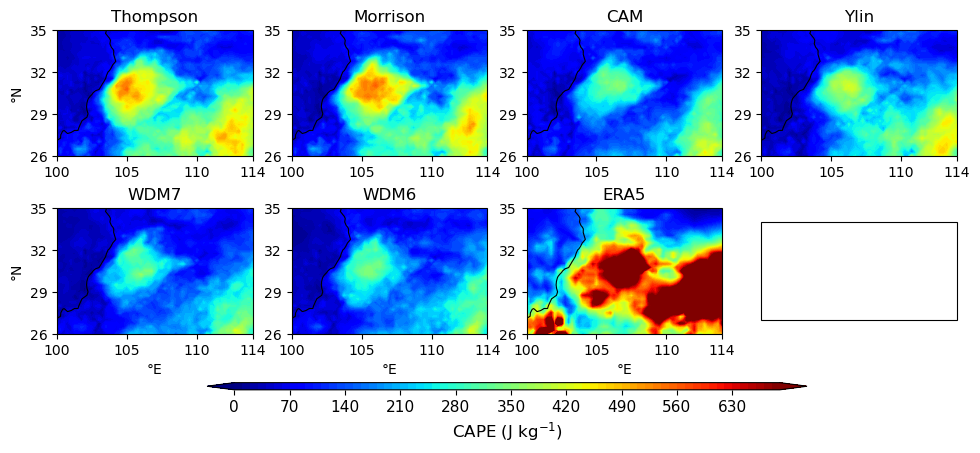

In [19]:
#datasets
ds = [meant_capetho, meant_capemor, meant_capecam, meant_capeylin, meant_capewdm7, meant_capewdm6, meant_capeERA]
titl=['Thompson', 'Morrison', 'CAM', 'Ylin', 'WDM7', 'WDM6', 'ERA5']
#colormap
cmap  = plt.cm.jet
#set clevels
clevs=np.arange(0,700,10)

#create figure
nrows, ncols = 2,4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10,4))
axs = axs.flatten()

# loop for datasets
for i in range (0, 7):
 cs = axs[i].contourf(meant_capeERA.longitude.values, meant_capeERA.latitude.values, ds[i], clevs, cmap=cmap, extend='both')
 axs[i].contour(height.z.longitude.values , height.z.latitude.values, height.z[0], levels=[3000], colors='black', linewidths=0.8)
 axs[i].set_title(f'{(3*titl)[i]}', fontsize = 12) 
 axs[i].set_xticks([100,105,110,114])
 axs[i].set_yticks([26,29,32,35])
 axs[i].tick_params(axis='x', labelsize=10)  
 axs[i].tick_params(axis='y', labelsize=10)
 axs[0].set_ylabel('°N', fontsize=10)
 axs[4].set_ylabel('°N', fontsize=10)
 axs[4].set_xlabel('°E', fontsize=10)
 axs[5].set_xlabel('°E', fontsize=10)
 axs[6].set_xlabel('°E', fontsize=10)
 axs[7].set_xlabel('°E', fontsize=10)


# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.005, 0.6, 0.018])
cbar=fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')
cbar.set_label(r'CAPE (J kg$^{-1}$)', fontsize = 12)
cbar.ax.tick_params(labelsize=11)
fig.subplots_adjust(bottom=0.1, top=0.95, left=0.05, right=0.95, wspace=0.2, hspace=0.1)

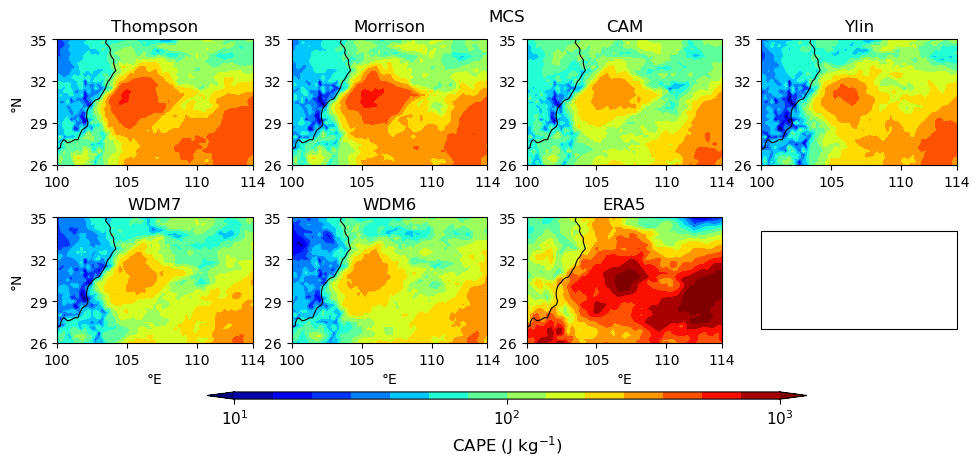

In [18]:
#datasets
ds = [meant_capetho, meant_capemor, meant_capecam, meant_capeylin, meant_capewdm7, meant_capewdm6, meant_capeERA]
titl=['Thompson', 'Morrison', 'CAM', 'Ylin', 'WDM7', 'WDM6', 'ERA5']

# Logarithmic levels
clevs = np.logspace(np.log10(10), np.log10(1000), num=15)
norm = colors.LogNorm(vmin=10, vmax=1000)
cmap = plt.cm.jet

# Create figure
nrows, ncols = 2, 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 4))
axs = axs.flatten()

fig.suptitle('MCS', fontsize=12, y=0.98)

for i in range(0, 7):
    cs = axs[i].contourf(
        meant_capeERA.longitude.values, meant_capeERA.latitude.values, ds[i],
        levels=clevs, cmap=cmap, norm=norm, extend='both'
    )
    axs[i].contour(height.z.longitude.values, height.z.latitude.values, height.z[0], levels=[3000],
                   colors='black', linewidths=0.8)
    axs[i].set_title(f'{(3 * titl)[i]}', fontsize=12)
    axs[i].set_xticks([100, 105, 110, 114])
    axs[i].set_yticks([26, 29, 32, 35])
    axs[i].tick_params(axis='x', labelsize=10)
    axs[i].tick_params(axis='y', labelsize=10)

# Axis labels
axs[0].set_ylabel('°N', fontsize=10)
axs[4].set_ylabel('°N', fontsize=10)
axs[4].set_xlabel('°E', fontsize=10)
axs[5].set_xlabel('°E', fontsize=10)
axs[6].set_xlabel('°E', fontsize=10)
axs[7].set_xlabel('°E', fontsize=10)

# Colorbar
cbar_ax = fig.add_axes([0.2, 0.005, 0.6, 0.018])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', ticks=[1, 10, 100, 1000])
cbar.set_label(r'CAPE (J kg$^{-1}$)', fontsize=12)
cbar.ax.tick_params(labelsize=11)

# Adjust layout
fig.subplots_adjust(bottom=0.1, top=0.95, left=0.05, right=0.95, wspace=0.2, hspace=0.1)

plt.savefig('/media/irene/Elements/Laptop_dec2023/Thesis_data/images_submission/cape-maps-mcs.png', dpi=400, bbox_inches='tight');

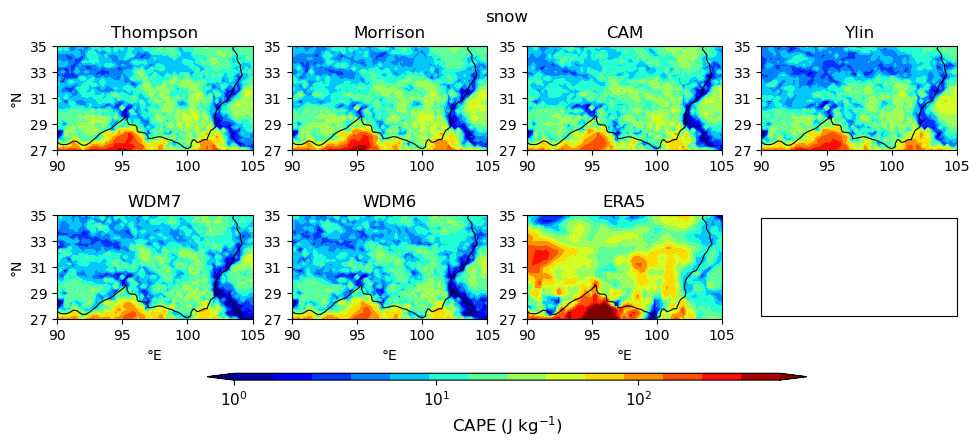

In [17]:
#datasets
ds = [smeant_capetho, smeant_capemor, smeant_capecam, smeant_capeylin, smeant_capewdm7, smeant_capewdm6, smeant_capeERA]
titl=['Thompson', 'Morrison', 'CAM', 'Ylin', 'WDM7', 'WDM6', 'ERA5']

# Logarithmic levels
clevs = np.logspace(np.log10(1), np.log10(500), num=15)
norm = colors.LogNorm(vmin=1, vmax=500)
cmap = plt.cm.jet

# Create figure
nrows, ncols = 2, 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 3.8))
axs = axs.flatten()

fig.suptitle('snow', fontsize=12, y=0.98)

for i in range(0, 7):
    cs = axs[i].contourf(
        smeant_capeERA.longitude.values, smeant_capeERA.latitude.values, ds[i],
        levels=clevs, cmap=cmap, norm=norm, extend='both'
    )
    axs[i].contour(sheight.z.longitude.values, sheight.z.latitude.values, sheight.z[0], levels=[3000],
                   colors='black', linewidths=0.8)
    axs[i].set_title(f'{(3 * titl)[i]}', fontsize=12)
    axs[i].set_xticks([90, 95, 100, 105])
    axs[i].set_yticks([27, 29, 31, 33, 35])
    axs[i].tick_params(axis='x', labelsize=10)
    axs[i].tick_params(axis='y', labelsize=10)

# Axis labels
axs[0].set_ylabel('°N', fontsize=10)
axs[4].set_ylabel('°N', fontsize=10)
axs[4].set_xlabel('°E', fontsize=10)
axs[5].set_xlabel('°E', fontsize=10)
axs[6].set_xlabel('°E', fontsize=10)
axs[7].set_xlabel('°E', fontsize=10)

# Colorbar
cbar_ax = fig.add_axes([0.2, 0.005, 0.6, 0.018])
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', ticks=[1, 10, 100])
cbar.set_label(r'CAPE (J kg$^{-1}$)', fontsize=12)
cbar.ax.tick_params(labelsize=11)

# Adjust layout
fig.subplots_adjust(bottom=0.1, top=0.95, left=0.05, right=0.95, wspace=0.2, hspace=0.1)

plt.savefig('/media/irene/Elements/Laptop_dec2023/Thesis_data/images_submission/cape-maps-snow.png', dpi=400, bbox_inches='tight');